# Credits

Citation : Ryan Bakker, Liesbet Hooghe, Seth Jolly, Gary Marks, Jonathan Polk, Jan Rovny, Marco Steenbergen, and Milada Anna Vachudova. 2020. “2019 Chapel Hill Expert Survey.” Version 2019.1. Available on chesdata.eu. Chapel Hill, NC: University of North Carolina, Chapel Hill. 


The 2019_CHES_dataset_means.dta Stata file contains average expert judgments per political
party. The 2019_CHES_dataset_expert-level.dta dataset provides information at the level of the
individual expert and allows researchers to aggregate expert scores and estimate standard deviations
among expert judgments

* Accessed by : Gayathry Dasika
* Purpose : Fourkind assignment

# Libraries 

For requirements.txt

In [1]:
import os
import pandas as pd
import requests
import numpy as np

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
# Jupyter notebook settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-5-22a72dfb6e2b>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Extraction of the Chapel Data
The exact links of the expert dataset from the given link as as follows

* Expert_dataset = 'https://www.chesdata.eu/s/CHES2019_experts.csv'
* Averaged_dataset = 'https://www.chesdata.eu/s/CHES2019V3.csv' 

There are 3800 survey responses

In [19]:
# Read data and load it 
expert_data = pd.read_stata('https://www.chesdata.eu/s/CHES2019_experts.dta')
average_data = pd.read_stata('https://www.chesdata.eu/s/CHES2019V3.dta')

# About the dataset

The questionnaire is divided into several main topics. 

* General Questions on European Integration
* Specific EU Policy Questions
* Ideological Questions
* Policy Dimensions
* Party characteristics
* EU Policy on Turkey

I need to scale the data properly so that i dont disturb the underlying distribution, but have the same scale. 

In [20]:
missing_data = pd.DataFrame(expert_data.isnull().sum().sort_values(ascending=False) / 3823 * 100)

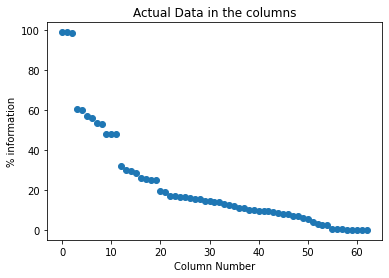

In [21]:
plt.title("Actual Data in the columns")
plt.scatter(np.arange(0,len(expert_data.isnull().sum())),expert_data.isnull().sum().sort_values(ascending=False) / 3823 * 100)
plt.xlabel("Column Number")
plt.ylabel("% information")
plt.show()

In [22]:
## Themes / Main topics in the questionnaire 
print(expert_data.columns)

Index(['id', 'party', 'party_name', 'party_id', 'position', 'eu_salience',
       'eu_dissent', 'eu_blur', 'lrecon', 'lrecon_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan', 'galtan_blur', 'galtan_dissent',
       'galtan_salience', 'lrgen', 'immigrate_policy', 'immigra_salience',
       'immigrate_dissent', 'multiculturalism', 'multicult_salience',
       'multicult_dissent', 'redistribution', 'redist_salience', 'environment',
       'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven',
       'civlib_laworder', 'sociallifestyle', 'religious_principles',
       'ethnic_minorities', 'nationalism', 'urban_rural', 'protectionism',
       'regions', 'russian_interference', 'anti_islam_rhetoric',
       'people_vs_elite', 'antielite_salience', 'corrupt_salience',
       'members_vs_leadership', 'eu_cohesion', 'eu_foreign', 'eu_intmark',
       'eu_budgets', 'eu_asylum', 'party_a_econ', 'party_b_econ',
       'party_c_econ', 'gender', 'dob', 'lrecon_self', 'galtan_sel

In [23]:
print(average_data.columns)

Index(['country', 'eastwest', 'party', 'party_id', 'eu_position',
       'eu_position_sd', 'eu_salience', 'eu_dissent', 'eu_blur', 'eu_cohesion',
       'eu_foreign', 'eu_intmark', 'eu_budgets', 'eu_asylum', 'lrgen',
       'lrecon', 'lrecon_sd', 'lrecon_salience', 'lrecon_dissent',
       'lrecon_blur', 'galtan', 'galtan_sd', 'galtan_salience',
       'galtan_dissent', 'galtan_blur', 'immigrate_policy',
       'immigrate_salience', 'immigrate_dissent', 'multiculturalism',
       'multicult_salience', 'multicult_dissent', 'redistribution',
       'redist_salience', 'environment', 'enviro_salience', 'spendvtax',
       'deregulation', 'econ_interven', 'civlib_laworder', 'sociallifestyle',
       'religious_principles', 'ethnic_minorities', 'nationalism',
       'urban_rural', 'protectionism', 'regions', 'russian_interference',
       'anti_islam_rhetoric', 'people_vs_elite', 'antielite_salience',
       'corrupt_salience', 'members_vs_leadership', 'eu_econ_require',
       'eu_political

### Parties 

In [28]:
parties_expert = expert_data['party_id'].unique()
parties_average = average_data['party_id'].unique()
# There are 277 parties in the survey as per the website. The parties are identified by id
assert len(parties_expert) == 277 
assert len(parties_average) == 277
assert parties_expert is parties_average
# There are 277 parties in both expert and average dataset 

AssertionError: 

### Comparing average and Expert data set columns

In [29]:
print("\n ** Average set ** \n",set(average_data.columns)-set(expert_data.columns)) # found in average data and not in expert data
print("\n ** Expert set **\n", set(expert_data.columns)-set(average_data.columns)) # found in expert data and not in expert data


 ** Average set ** 
 {'immigrate_salience', 'eastwest', 'eu_position', 'country'}

 ** Expert set **
 {'party_b_econ', 'immigra_salience', 'party_c_econ', 'cname', 'gender', 'party_name', 'dob', 'party_a_econ', 'galtan_self', 'position', 'lrecon_self', 'id'}


In [30]:
# Comparing party_ids 
set(average_data["party_id"].unique()) - set(expert_data["party_id"].unique())

{844.0, 1016.0}

### Mistakes correction in expert dataset based on observation

In [31]:
# Replace the 843, 1009 in the expert csv with 844, 1016 (code book reference)
expert_data.loc[(expert_data["party_id"]==843),"party_id"] = 844
expert_data.loc[(expert_data["party_id"]==1009),"party_id"] = 1016
set(average_data["party_id"].unique()) - set(expert_data["party_id"].unique())

set()

In [32]:
# Column rename 
expert_data = expert_data.rename(columns={'immigra_salience':'immigrate_salience','position':'eu_position'})
expert_data.columns

Index(['id', 'party', 'party_name', 'party_id', 'eu_position', 'eu_salience',
       'eu_dissent', 'eu_blur', 'lrecon', 'lrecon_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan', 'galtan_blur', 'galtan_dissent',
       'galtan_salience', 'lrgen', 'immigrate_policy', 'immigrate_salience',
       'immigrate_dissent', 'multiculturalism', 'multicult_salience',
       'multicult_dissent', 'redistribution', 'redist_salience', 'environment',
       'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven',
       'civlib_laworder', 'sociallifestyle', 'religious_principles',
       'ethnic_minorities', 'nationalism', 'urban_rural', 'protectionism',
       'regions', 'russian_interference', 'anti_islam_rhetoric',
       'people_vs_elite', 'antielite_salience', 'corrupt_salience',
       'members_vs_leadership', 'eu_cohesion', 'eu_foreign', 'eu_intmark',
       'eu_budgets', 'eu_asylum', 'party_a_econ', 'party_b_econ',
       'party_c_econ', 'gender', 'dob', 'lrecon_self', 'galta

In [36]:
all_columns = {}
word_columns = {}
num_columns = {}
dont_know = {}
for i in expert_data.columns:
    print(i)
    u = expert_data[i].unique()
    print(set([type(k) for k in u]))
    all_columns[i] = u
    #dont know 
    if i in ['party_name','cname']:
        word_columns[i] = u
        print(" : Sorted in word_column")
    elif '.d' in u:
        dont_know[i] = u
        print(" : Sorted in dont_know")
    else:
        num_columns[i] = u
        print(" : Sorted in num_column")
    print('\n===\n')

id
{<class 'numpy.float32'>}
 : Sorted in num_column

===

party
{<class 'numpy.int8'>}
 : Sorted in num_column

===

party_name
{<class 'str'>}
 : Sorted in word_column

===

party_id
{<class 'numpy.float32'>}
 : Sorted in num_column

===

eu_position
{<class 'numpy.float64'>}
 : Sorted in num_column

===

eu_salience
{<class 'numpy.float64'>}
 : Sorted in num_column

===

eu_dissent
{<class 'numpy.float64'>}
 : Sorted in num_column

===

eu_blur
{<class 'numpy.float64'>}
 : Sorted in num_column

===

lrecon
{<class 'numpy.float64'>}
 : Sorted in num_column

===

lrecon_blur
{<class 'numpy.float64'>}
 : Sorted in num_column

===

lrecon_dissent
{<class 'numpy.float64'>}
 : Sorted in num_column

===

lrecon_salience
{<class 'numpy.float64'>}
 : Sorted in num_column

===

galtan
{<class 'numpy.float64'>}
 : Sorted in num_column

===

galtan_blur
{<class 'numpy.float64'>}
 : Sorted in num_column

===

galtan_dissent
{<class 'numpy.float64'>}
 : Sorted in num_column

===

galtan_salience


<ipython-input-36-43261ef7602d>:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif '.d' in u:


In [ ]:
# Values match 
print(average_data["party_id"].values == sorted(expert_data["party_id"].unique()))

## Handling Missing Values 

In [39]:
# The missing values in expert csv
"""
Assumption
We replace the missing values with the numbers from average dataset. 
The 'nan' doesn't mean the scientist doesn't know. It means they didn't share an opinion. 
So it is safe to assume they are a part of population mean as represented in the average dataset. 
One advantage of this is that it doesnt affect the opinion of those who voted. 
"""
#Example 
i = np.array([1,2,3,4,5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,6,7,8,9,10])
np.mean(i)

5.5

In [57]:
# Create a new df 
df = expert_data.copy()

In [66]:
# Replace the numerical NaN with mean value
for c in num_columns.keys():    
    if c in ['gender','dob']:
        df[c] = df[c].replace(to_replace=np.nan,value=None)
    else:
        df[c] = df[c].fillna(np.mean(df[c]))

In [67]:
personal_details = df[set(expert_data.columns) - set(average_data.columns)]
personal_details.columns

Index(['party_b_econ', 'party_c_econ', 'cname', 'party_name', 'gender', 'dob',
       'party_a_econ', 'galtan_self', 'lrecon_self', 'id'],
      dtype='object')

In [69]:
personal_attr = personal_details.columns
personal_details["party_id"] = df["party_id"]
personal_details["party"] = df["party"].values
personal_details = personal_details.set_index("party_id")

In [70]:
personal_details.columns

Index(['party_b_econ', 'party_c_econ', 'cname', 'party_name', 'gender', 'dob',
       'party_a_econ', 'galtan_self', 'lrecon_self', 'id', 'party'],
      dtype='object')

In [71]:
# Consider numerical columns only 
df_num = df.drop(columns = personal_details.columns, axis=1)
df_num["party_a_econ"] = personal_details["party_a_econ"].values
df_num["party_b_econ"] = personal_details["party_b_econ"].values
df_num["party_c_econ"] = personal_details["party_c_econ"].values
df_num.head()

,party_id,eu_position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigrate_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require,party_a_econ,party_b_econ,party_c_econ
0,2010.0,7.0,9.0,1.0,3.146504,5.0,3.615428,1.0,10.0,6.0,2.7838,5.0,5.0,5.000000,7.0,5.0,1.0,5.0,5.0,1.0,8.0,9.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,9.0,4.0,1.0,5.0,1.0,5.0,9.0,7.0,7.0,7.0,7.0,4.0,0.7725,1.028167,1.420311,4.916667,4.186047,4.552632,3.0,9.0,6.0
1,2003.0,5.0,6.0,4.0,3.146504,3.0,3.615428,5.0,7.0,9.0,2.7838,5.0,8.0,5.299446,5.0,5.0,5.0,5.0,7.0,5.0,1.0,10.0,5.0,5.0,2.0,3.0,0.0,7.0,8.0,4.0,5.0,7.0,7.0,9.0,9.0,2.0,1.0,9.0,9.0,5.0,7.0,7.0,4.0,3.0,3.0,4.0,0.7725,1.028167,1.420311,4.916667,4.186047,4.552632,3.0,9.0,6.0
2,2004.0,7.0,9.0,2.0,3.146504,5.0,3.615428,1.0,9.0,5.0,2.7838,2.0,8.0,4.000000,3.0,5.0,1.0,5.0,8.0,1.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,5.0,2.0,5.0,7.0,9.0,9.0,2.0,0.0,5.0,9.0,5.0,9.0,7.0,6.0,7.0,7.0,6.0,0.7725,1.028167,1.420311,4.916667,4.186047,4.552632,3.0,9.0,6.0
3,2017.0,3.0,6.0,4.0,3.146504,7.0,3.615428,5.0,9.0,9.0,2.7838,2.0,8.0,6.000000,6.0,5.0,1.0,5.0,8.0,1.0,8.0,10.0,5.0,5.0,7.0,5.0,5.0,6.0,5.0,5.0,9.0,7.0,2.0,9.0,9.0,2.0,1.0,2.0,9.0,5.0,9.0,7.0,4.0,7.0,4.0,3.0,0.7725,1.028167,1.420311,4.916667,4.186047,4.552632,3.0,9.0,6.0
4,2014.0,3.0,6.0,4.0,3.146504,7.0,3.615428,5.0,5.0,9.0,2.7838,2.0,8.0,6.000000,10.0,10.0,1.0,5.0,8.0,1.0,8.0,6.0,5.0,5.0,7.0,4.0,2.0,9.0,8.0,6.0,9.0,7.0,5.0,9.0,9.0,7.0,4.0,2.0,9.0,7.0,9.0,7.0,5.0,7.0,5.0,3.0,0.7725,1.028167,1.420311,4.916667,4.186047,4.552632,3.0,9.0,6.0


### Numerical columns of expert data

In [74]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3823 entries, 0 to 3822
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   party_id               3823 non-null   float32
 1   eu_position            3823 non-null   float64
 2   eu_salience            3823 non-null   float64
 3   eu_dissent             3823 non-null   float64
 4   eu_blur                3823 non-null   float64
 5   lrecon                 3823 non-null   float64
 6   lrecon_blur            3823 non-null   float64
 7   lrecon_dissent         3823 non-null   float64
 8   lrecon_salience        3823 non-null   float64
 9   galtan                 3823 non-null   float64
 10  galtan_blur            3823 non-null   float64
 11  galtan_dissent         3823 non-null   float64
 12  galtan_salience        3823 non-null   float64
 13  lrgen                  3823 non-null   float64
 14  immigrate_policy       3823 non-null   float64
 15  immi

In [77]:
personal_details.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 3823 entries, 119.0 to 2507.0
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   party_b_econ  3823 non-null   float64
 1   party_c_econ  3823 non-null   float64
 2   cname         3823 non-null   object 
 3   party_name    3823 non-null   object 
 4   gender        3823 non-null   float64
 5   dob           3823 non-null   float64
 6   party_a_econ  3823 non-null   float64
 7   galtan_self   3823 non-null   float64
 8   lrecon_self   3823 non-null   float64
 9   id            3823 non-null   float32
 10  party         3823 non-null   int8   
dtypes: float32(1), float64(7), int8(1), object(2)
memory usage: 317.3+ KB


In [ ]:
# Need to scale these items and remove some unwanted standard deviation columns - as they are not votes. 
u_sd = df_num[["lrecon_sd","eu_position_sd","galtan_sd"]]
df_num = df_num.drop(columns=["lrecon_sd","eu_position_sd","galtan_sd"], axis=1)
df_num.head()

# Load data 

In [79]:
# Save it locally in serialised format
df.to_pickle('CHES_Expert_clean.pkl')
df_num.to_pickle('CHES_Cleaned_Numerical_data.pkl')
personal_details.to_pickle('CHES_Personal_details.pkl')

# Analysis : 
## Dimensionality Reduction & Clustering 

In [82]:
df_num = df_num.set_index('party_id') # Primary key
df_num.describe()

,eu_position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigrate_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,eu_econ_require,eu_political_require,eu_googov_require,party_a_econ,party_b_econ,party_c_econ
count,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,4.971637,6.085722,2.625751,3.146504,4.952448,3.615428,2.960526,6.355095,5.076752,2.783800,2.856802,6.404878,5.299446,5.681792,5.952587,2.580155,5.577518,5.532997,2.433995,4.409894,6.183839,5.188228,4.736561,4.586527,4.796296,4.548951,5.151542,4.473851,4.234472,4.697802,5.175931,4.683125,5.281676,4.527488,2.962052,3.170686,4.695235,4.401390,4.575509,7.051845,5.465817,4.011546,5.134867,3.784270,3.723848,4.916667,4.186047,4.552632,2.710766,9.153493,5.821687
std,1.865867,2.359396,1.387981,1.782622,2.362989,1.735698,1.346705,2.163199,3.013176,1.587517,1.540796,2.330587,2.509182,2.784887,2.513086,1.927223,2.745755,2.585548,1.763432,2.387907,2.178548,2.445450,2.631340,2.490274,2.435863,2.494042,2.765934,3.108322,2.817953,2.814370,2.967025,2.291013,2.319507,2.241580,2.670257,3.067187,2.626636,3.183375,3.046388,2.285095,1.328375,1.598227,1.519420,1.530241,1.619519,0.134119,0.256017,0.230688,0.784736,0.798622,0.929943
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.000000
25%,4.000000,5.000000,2.625751,3.000000,3.000000,3.615428,2.960526,5.000000,3.000000,2.783800,2.856802,5.000000,3.000000,4.000000,4.000000,1.000000,4.000000,4.000000,1.000000,3.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,1.000000,0.000000,3.000000,2.000000,2.000000,6.000000,5.000000,3.000000,5.000000,3.000000,3.000000,4.916667,4.186047,4.552632,2.000000,9.000000,5.000000
50%,5.000000,6.085722,2.625751,3.146504,5.000000,3.615428,2.960526,6.355095,5.000000,2.783800,2.856802,6.404878,5.299446,5.681792,5.952587,2.580155,5.577518,5.532997,2.433995,4.409894,6.183839,5.188228,4.736561,4.586527,4.796296,4.548951,5.151542,4.473851,4.234472,4.697802,5.000000,4.683125,5.281676,4.527488,2.962052,3.000000,4.695235,4.401390,4.575509,7.051845,5.465817,4.011546,5.134867,3.784270,3.723848,4.916667,4.186047,4.552632,3.000000,9.000000,6.000000
75%,7.000000,8.000000,2.625751,3.146504,7.000000,3.615428,2.960526,8.000000,8.000000,2.783800,2.856802,8.000000,7.000000,8.000000,8.000000,3.000000,8.000000,7.000000,3.000000,6.000000,8.000000,7.000000,7.000000,6.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,7.000000,6.000000,7.000000,5.000000,4.000000,5.000000,6.0

# Scale the data 

PCA or any dimensionality reduction technique depends on the scaling of the features. 
We need the measurements to be on the same measuring scale. Here the questionnaires have different scales 0-7, 1-7 ,0-10 etc.

PCA : Primer
Consider a matrix X with N rows (aka "expert opinion") and K columns (aka "questions"). 
For this matrix we begin by constructing a variable space with as many dimensions as there are variables. Each variable represents one coordinate axis. For each variable, the length has been standardized according to a scaling criterion, normally by scaling to unit variance. It can be achieved by using Standard Scaler class.


In [83]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler()

In [87]:
X = std.fit_transform(df_num)
df_scale = pd.DataFrame(index = df_num.index, data=X,columns=df_num.columns)
df_scale.describe()

,eu_position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigrate_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,eu_econ_require,eu_political_require,eu_googov_require,party_a_econ,party_b_econ,party_c_econ
count,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03,3.823000e+03
mean,-8.921279e-17,2.676384e-16,3.531340e-17,2.592747e-16,2.267492e-16,4.460640e-17,2.416180e-16,4.646500e-16,-7.434400e-17,2.564868e-16,-2.973760e-17,-1.356778e-16,1.784256e-16,5.947520e-17,3.048104e-16,-8.177839e-17,-1.784256e-16,2.230320e-16,-7.434400e-18,-8.177839e-17,7.062680e-17,5.947520e-17,2.825072e-16,4.293366e-16,-4.981048e-16,2.750728e-16,-1.524052e-16,-8.921279e-17,-1.115160e-16,-4.460640e-17,-1.635568e-16,-1.598396e-16,-3.865888e-16,-3.735786e-16,-2.081632e-16,-8.549559e-17,2.787900e-17,3.382652e-16,2.676384e-16,-1.784256e-16,-1.189504e-16,-5.204080e-17,5.129736e-16,3.791544e-16,-2.155976e-16,6.604854e-15,-1.603042e-17,-7.684428e-15,-1.635568e-16,-3.568512e-16,-2.453352e-16
std,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00,1.000131e+00
min,-2.128853e+00,-2.579694e+00,-1.892025e+00,-1.765330e+00,-2.096115e+00,-2.083255e+00,-2.198636e+00,-2.938207e+00,-1.685071e+00,-1.753785e+00,-1.854350e+00,-2.748542e+00,-2.112297e+00,-2.040491e+00,-2.368947e+00,-1.338970e+00,-2.031589e+00,-2.140250e+00,-1.380441e+00,-1.847003e+00,-2.838885e+00,-2.121861e+00,-1.800292e+00,-1.842017e+00,-1.969292e+00,-1.824166e+00,-1.862740e+00,-1.439502e+00,-1.502873e+00,-1.669438e+00,-1.744713e+00,-2.044396e+00,-2.277367e+00,-2.020040e+00,-1.109421e+00,-1.033879e+00,-1.787781e+00,-1.382798e+00,-1.502142e+00,-3.086422e+00,-3.362305e+00,-1.884551e+00,-2.721701e+00,-1.819735e+00,-1.682107e+00,-2.920669e+01,-1.244630e+01,-1.540219e+01,-2.180338e+00,-3.949183e+00,-4.110130e+00
25%,-5.208112e-01,-4.602299e-01,0.000000e+00,-8.219526e-02,-8.263701e-01,0.000000e+00,3.298030e-16,-6.265131e-01,-6.893137e-01,2.797748e-16,0.000000e+00,-6.028789e-01,-9.165323e-01,-6.039785e-01,-7.770697e-01,-8.200204e-01,-5.746049e-01,-5.929872e-01,-8.132907e-01,-5.905081e-01,-5.434783e-01,-4.859569e-01,-6.600394e-01,-6.371727e-01,-7.375339e-01,-6.211418e-01,-7.779733e-01,-7.959842e-01,-7.930452e-01,-6.033409e-01,-7.334673e-01,-7.347602e-01,-5.526365e-01,-6.815227e-01,-7.348763e-01,-1.033879e+00,-6.454860e-0

# Some Ideas : 

Task 2 : Represent the political parties described in the data as two-dimensional data points using a
suitable dimensionality reduction method. Visualize the results.


In [100]:
def gen(x):
    return [np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255)]

gen(5)

[212, 242, 120]

In [107]:
labels = average_data[["party_id","party"]]
labels["color_map"] = labels["party_id"].apply(lambda x: gen(x))
labels.head()

<ipython-input-107-cfd399e618e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels["color_map"] = labels["party_id"].apply(lambda x: gen(x))


,party_id,party,color_map
0,102.0,PS,"[54, 150, 98]"
1,103.0,SP/SPA,"[47, 106, 224]"
2,104.0,ECOLO,"[178, 251, 253]"
3,105.0,AGALEV,"[183, 92, 245]"
4,106.0,PRL/MR,"[154, 139, 225]"


# Dimensionality reduction 
UMAP 

In [108]:
from umap import UMAP

In [118]:
try:
    df_scale = df_scale.join(how='inner',other=labels)
except:
    pass
df_scale.head()

,eu_position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,galtan_dissent,galtan_salience,lrgen,immigrate_policy,immigrate_salience,immigrate_dissent,multiculturalism,multicult_salience,multicult_dissent,redistribution,redist_salience,environment,enviro_salience,spendvtax,deregulation,econ_interven,civlib_laworder,sociallifestyle,religious_principles,ethnic_minorities,nationalism,urban_rural,protectionism,regions,russian_interference,anti_islam_rhetoric,people_vs_elite,antielite_salience,corrupt_salience,members_vs_leadership,eu_cohesion,eu_foreign,eu_intmark,eu_budgets,eu_asylum,eu_econ_require,eu_political_require,eu_googov_require,party_a_econ,party_b_econ,party_c_econ,party,color_map
party_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
102.0,0.551217,-0.884123,0.000000,-6.432402e-01,-1.249618,0.000000,-7.133352e-01,0.760503,-1.685071,-1.123788e+00,0.00000,-0.173746,-1.315121,-1.322235,-0.777070,0.217878,-1.667343,1.806443e-01,0.32101,-1.847003,1.751928,-0.894933,-6.600394e-01,-1.842017,-1.969292e+00,-1.824166e+00,-1.139562e+00,-1.117743,-1.502873,-1.314073,-1.070549e+00,-0.298215,7.409111e-01,2.441683,-1.663313e-16,1.248641e+00,-0.645486,-1.382798e+00,-1.502142e+00,1.290336,1.155083,0.618550,-8.877392e-02,2.101728e+00,2.023181e+00,6.623172e-15,0.0,-7.701273e-15,-0.905858,1.060097,2.342722,PS,"[54, 150, 98]"
102.0,0.551217,-1.731908,0.000000,-8.219526e-02,-1.249618,0.000000,2.931515e-02,0.298165,-0.689314,2.797748e-16,0.00000,0.000000,-1.315121,-0.244851,-1.175039,0.000000,-0.938851,3.435614e-16,0.00000,-1.009340,0.374684,0.000000,3.375827e-16,-0.637173,-3.646735e-16,3.561667e-16,-3.211553e-16,0.000000,0.000000,0.000000,-2.993890e-16,0.000000,-3.829670e-16,1.103166,-1.663313e-16,-1.448061e-16,-0.645486,2.790418e-16,2.915895e-16,0.000000,0.000000,0.000000,5.846273e-16,2.902466e-16,-2.742464e-16,6.623172e-15,0.0,-7.701273e-15,0.368623,-0.192223,0.191771,PS,"[54, 150, 98]"
102.0,0.551217,-1.308015,0.990237,2.491540e-16,-0.826370,-1.507042,3.298030e-16,0.760503,-0.689314,-4.937916e-01,0.00000,-1.890276,-0.916532,-0.603979,0.018869,0.736828,-0.574605,1.806443e-01,0.32101,-0.590508,0.374684,-0.485957,1.001291e-01,-1.038788,-7.375339e-01,-1.022150e+00,-7.779733e-01,-0.152466,-0.793045,-0.247975,-5.930325e-02,-0.734760,3.097286e-01,-0.681523,-1.109421e+00,2.704180e-01,-0.264721,-1.261060e-01,4.676612e-01,-0.022691,0.000000,-0.007225,-1.405238e+00,-1.166158e+00,1.705372e-01,6.623172e-15,0.0,-7.701273e-15,0.368623,1.060097,-0.883704,PS,"[54, 150, 98]"
102.0,0.551217,-0.036337,0.000000,-6.432402e-01,-1.249618,0.000000,-1.455986e+00,1.222842,-0.689314,2.797748e-16,-0.55615,0.255386,-1.315121,-1.322235,-1.175039,-0.301071,-1.667343,-9.798029e-01,-0.24614,-1.428171,1.292847,0.331995,-6.600394e-01,-1.038788,-1.558706e+00,-1.423158e+00,-1.139562e+00,-1.117743,-1.147959,-1.314073,-1.407631e+00,-1.607851,3.097286e-01,0.656994,-7.348763e-01,-3.817306e-01,-0.645486,-7.544522e-01,-8.455411e-01,0.414984,1.155083,1.244326,-8.877392e-02,-5.125808e-01,7.880851e-01,6.623172e-15,0.0,-7.701273e-15,-0.905858,1.060097,1.267247,PS,"[54, 150, 98]"
102.0,0.551217,-1.308015,-0.450894,2.491540e-16,-0.826370,-1.507042,3.298030e-16,0.760503,-0.357395,1.396199e+00,0.00000,-1.890276,-0.916532,-0.603979,0.018869,-0.301071,-0.574605,-2.061714e-01,0.32101,-0.590508,0.374684,-0.076981,1.001291e-01,-0.637173,-7.375339e-01,-6.211418e-01,-4.163846e-01,-0.795984,-0.083217,-0.247975,-3.963853e-01,0.138330,7.409111e-01,-0.235350,-1.109421e+00,-3.817306e-01,0.116044,-7.544522e-01,-1.502142e+00,0.852660,0.402185,0.618550,-8.877392e-02,-5.125808e-01,1.405633e+00,6.623172e-15,0.0,-7.701273e-15,0.368623,-0.192223,0.191771,PS,"[54, 150, 98]"


In [119]:
df_scale = df_scale.drop("color_map",axis=1)

In [122]:
df_scale.to_pickle("Standard_numerical_data.pkl")